In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from sklearn.decomposition import RandomizedPCA
import numpy as np
import scipy.stats as stats


df = pd.read_pickle('../data/relationship_features_forclustering.pandas_df')

df.columns 


Index([u'message_count', u'message_count_user', u'message_count_contact',
       u'sent_at', u'word_count', u'word_count_user', u'word_count_contact',
       u'positive', u'positive_user', u'positive_contact', u'negative',
       u'negative_user', u'negative_contact', u'neutral', u'neutral_user',
       u'neutral_contact', u'compound', u'compound_user', u'compound_contact',
       u'response_time', u'response_time_user', u'response_time_contact',
       u'sentiment_reciprocity', u'message_count_reciprocity',
       u'word_count_reciprocity', u'response_time_reciprocity'],
      dtype='object')

In [3]:
df[:10]

,message_count,message_count_user,message_count_contact,sent_at,word_count,word_count_user,word_count_contact,positive,positive_user,positive_contact,...,compound,compound_user,compound_contact,response_time,response_time_user,response_time_contact,sentiment_reciprocity,message_count_reciprocity,word_count_reciprocity,response_time_reciprocity


In [67]:
df = df[["message_count","compound","word_count","message_count_reciprocity","word_count_reciprocity"]]
df.dropna(inplace = True)

df.shape

/Users/Camila/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


(14, 5)

In [68]:
pca = RandomizedPCA(n_components=3).fit(df) # pca is an instance of class randomizedPCA with data['data']

X = pca.transform(df) # reduces data from (1797,64) to (1797,2) though not sure how.

print(stats.describe(X))
print X.shape

print pca.explained_variance_
print pca.explained_variance_ratio_
print pca.explained_variance_ratio_.cumsum()

DescribeResult(nobs=14, minmax=(array([-0.26970789, -0.18514516, -0.12010986]), array([ 0.77781493,  0.25394702,  0.12158219])), mean=array([ -1.18952467e-16,   7.93016446e-18,   1.82889418e-16]), variance=array([ 0.08142902,  0.01492412,  0.0042894 ]), skewness=array([ 1.42684992,  0.38861975, -0.13869449]), kurtosis=array([ 1.92065892, -0.66110923, -0.26212943]))
(14, 3)
[ 0.07561266  0.01385811  0.00398301]
[ 0.7980924   0.14627251  0.04204072]
[ 0.7980924   0.94436491  0.98640563]


Populating the interactive namespace from numpy and matplotlib


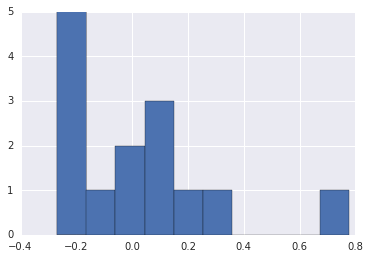

In [69]:
%pylab inline
plt.hist(X[:,0])

#plt.scatter(X[:,0], X[:,1])
plt.show()

Populating the interactive namespace from numpy and matplotlib


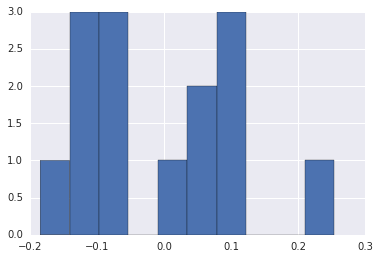

In [70]:
%pylab inline
plt.hist(X[:,1])
plt.show()

[[ 0.23375894  0.22610971]
 [ 0.30074045  0.21405077]
 [ 0.02706632  0.42841645]
 [ 0.02285089  0.43127695]
 [ 0.01904634  0.40321856]
 [ 0.03770277  0.40497944]
 [ 0.01628617  0.4286285 ]
 [ 0.21205274  0.20733124]
 [ 0.36515744  0.10891683]
 [ 0.38252067  0.10219247]
 [ 0.42173291  0.09015936]
 [ 0.60707097  0.23502166]
 [ 0.46080894  0.13179706]
 [ 1.04445665  0.70610257]]


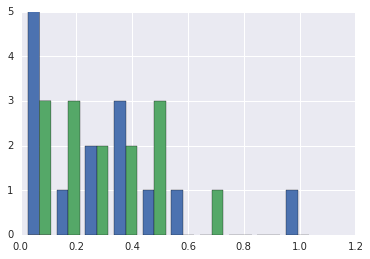

In [71]:
pred = []
k_means = kmeans(X,2)

centroids = k_means[0]
variance = k_means[1]

D_k = [cdist(X, centroids, 'euclidean')] # use code book to calulate distances for each point

print(D_k[0 ])

plt.hist(D_k[0])
plt.show()

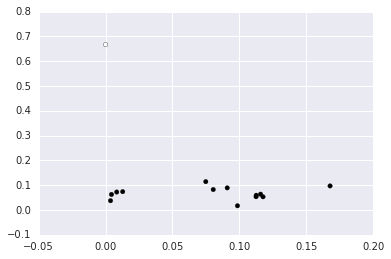

In [72]:
pred = []
k_means = KMeans(n_clusters = 2, init='k-means++')
pred = k_means.fit_predict(df)

k_means.inertia_
plt.scatter(df["message_count"],df["compound"] , c=pred)
plt.title("")

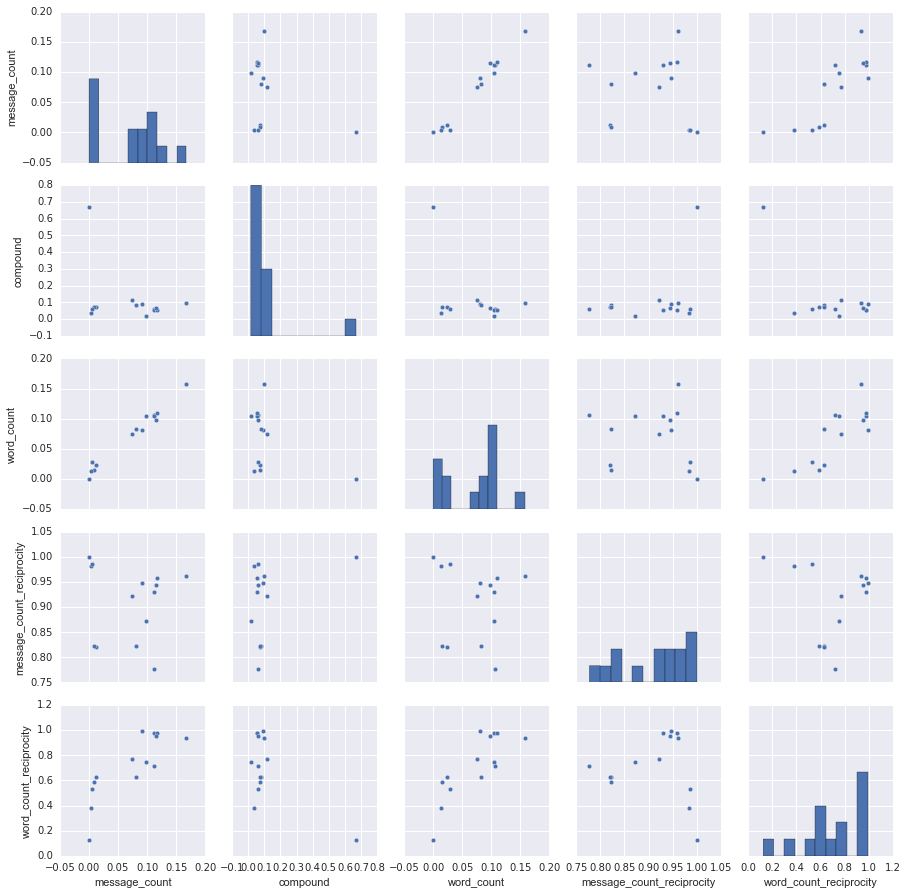

In [73]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline  


s = sns.pairplot(df)

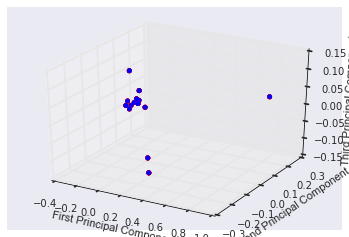

In [74]:
# 3d plot for 3 %pylab inline
from mpl_toolkits.mplot3d import Axes3D
colors = ["b", "r", "k", "m", "g"]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for ii, pp in enumerate(X):
    ax.scatter(X[:,0], X[:,1], X[:,2], color = colors[pred[ii]])


ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.show()

In [75]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
for n in xrange(2,20):
    for e in np.arange(0.1,1,0.1):
        pca = RandomizedPCA(n_components=n, whiten=True).fit(df) # pca is an instance of class randomizedPCA with data['data']

        X = pca.transform(df) # reduces data from (1797,64) to (1797,2) though not sure how.



        db = DBSCAN(eps=e, min_samples=10).fit(X)
        labels = db.labels_

        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        
        print n, ' PCs'
        print 'eps = ', e
        print('Estimated number of clusters: %d' % n_clusters_)
        print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

2  PCs
eps =  0.1
Estimated number of clusters: 0


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)